In [41]:
#Sri Jay Adarsh Gogineni
#20025484
#HW_04_NaiveBayes

In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Load the dataset
dataset = pd.read_csv('breast-cancer-wisconsin.csv')

# Display 
dataset.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [24]:
#Summary of Statistics(min,max,mean)
summary = dataset.describe()
print(summary)

             Sample          F1          F2          F3          F4  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               F5          F7          F8          F9       Class  
count  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.437768    2.866953    1.589413    2.689557  
std      2.214300    2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.000000    1.000000    2.000000  
25%      2.000000   

In [31]:
dataset.replace("?", np.nan, inplace=True)

#drop the missing values
dataset.dropna(inplace=True)

In [34]:
# Rename the columns to more descriptive names
dataset = dataset.rename(columns={
    'F1': 'Clump_Thickness',
    'F2': 'Uniformity_of_Cell_Size',
    'F3': 'Uniformity_of_Cell_Shape',
    'F4': 'Marginal_Adhesion',
    'F5': 'Single_Epithelial_Cell_Size',
    'F6': 'Bare_Nuclei',
    'F7': 'Bland_Chromatin',
    'F8': 'Normal_Nucleoli',
    'F9': 'Mitoses',
    'Class': 'Diagnosis'
})
dataset['Diagnosis'].replace({2: 'benign', 4: 'malignant'}, inplace=True)

X = dataset.drop('Diagnosis', axis=1)
Y = dataset['Diagnosis']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [36]:

# Create the Naïve Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(X_train, Y_train)

# Make predictions on the testing data
Y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Accuracy: 0.8926829268292683

Classification Report:
               precision    recall  f1-score   support

      benign       0.86      0.99      0.92       127
   malignant       0.98      0.73      0.84        78

    accuracy                           0.89       205
   macro avg       0.92      0.86      0.88       205
weighted avg       0.90      0.89      0.89       205



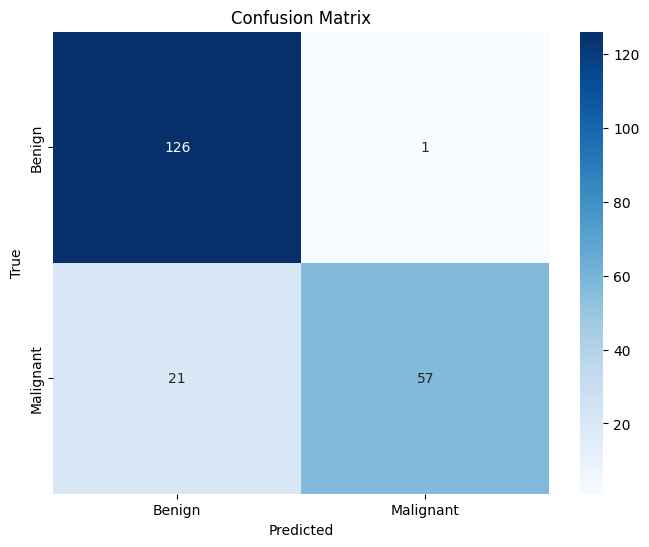

In [40]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()